Netflix! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.


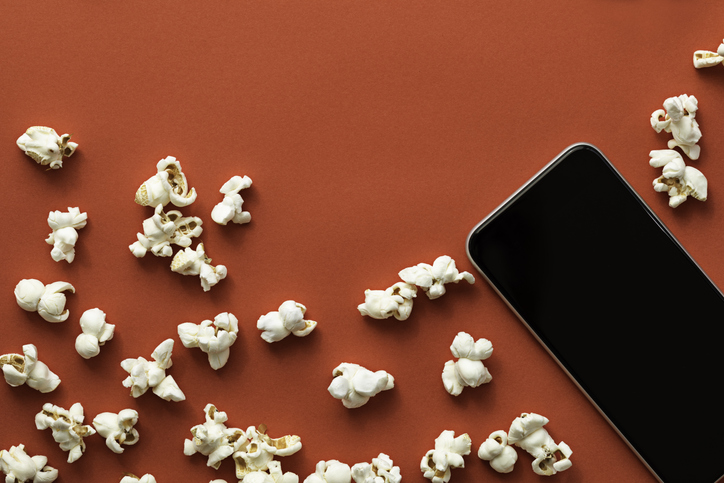

# Loading the data from a CSV



In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

In [10]:
# Print the first 5 rows of the DataFrame
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [4]:
netflix_df.shape

(7787, 11)

# Filtering for movies

We have our data!

Now we can dive in and start looking at movie lengths.Looking at the first five rows of our new DataFrame, we notice a column "type".

Scanning th ecolumn ,it's clear there are also TV shows in the dataset.

Fortunately, a DataFrame allows us to filter data quickly , and we can select the rows where "type" is "Movie".While we're at it, we don't need information from all of the columnsi, so let's create a new DataFrame "netflix_movies" containing only "title", "country", "genre", "release_year", and "duration".

In [11]:
# Subset the DataFrame for type "Movie"
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]

In [12]:
# Select only the columns of interest
selected_columns = ["title", "country", "genre", "release_year", "duration"]
netflix_movies_col_subset = netflix_df[selected_columns]

In [13]:
# Print the first 5 rows of the new DataFrame
netflix_movies_col_subset.head(5)

,title,country,genre,release_year,duration
0,3%,Brazil,International TV,2020,4
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123


In [14]:
netflix_movies_col_subset.shape

(7787, 5)

# Creating a scatter plot

We've read in the raw data ,selected rows of movies,and have limited our DataFrame to our columns of interest.

Let's try visualizing the data again to inspect the data  over a longer range of time.

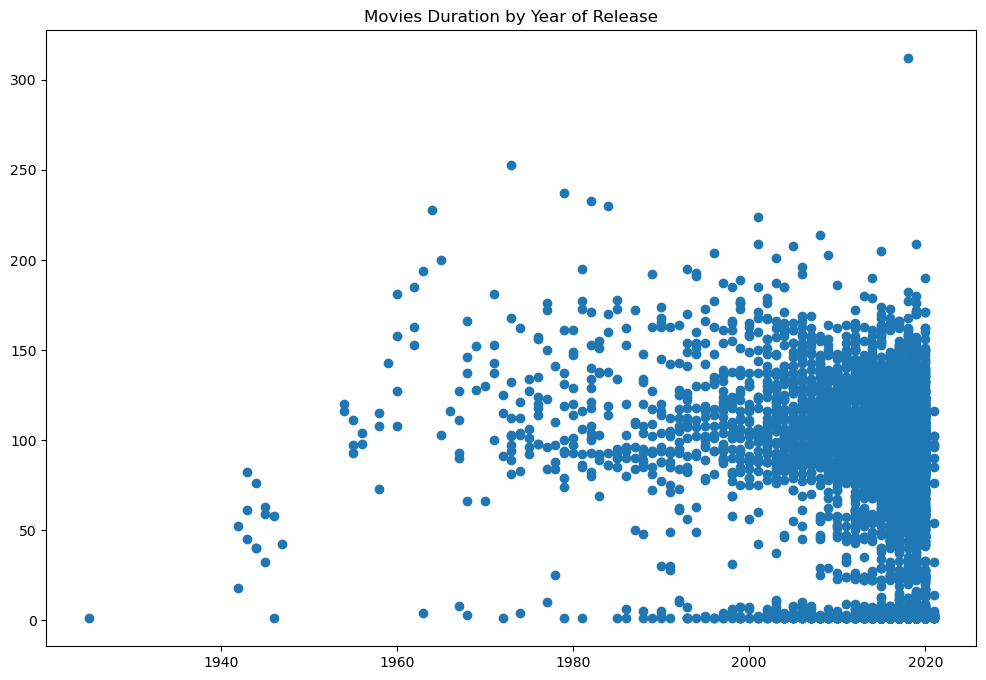

In [15]:
# Create a figure and increase the figure size 
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"])

# Create a title 
plt.title("Movies Duration by Year of Release")

# Show the plot 
plt.show()

# Digging deeper


Upon further ınspection,something else is going on.

Some of these films are under an hour long.Let's filter our DataFrame for movies with a "duration" under 60 minutes and look at the genres.

This might give us some insight into what dragging down the average.

In [17]:
# Filter for durations shorter than 60 minutes 
short_movies = netflix_movies_col_subset[netflix_movies_col_subset["duration"] < 60]

# Print the first 5 rows of short_movies 
short_movies.head(5)

,title,country,genre,release_year,duration
0,3%,Brazil,International TV,2020,4
5,46,Turkey,International TV,2016,1
11,1983,Poland,Crime TV,2018,1
12,1994,Mexico,Crime TV,2019,1
16,Feb-09,NaN,International TV,2018,1


In [18]:
short_movies.shape

(2830, 5)

In [19]:
# Define an empty list 
colors = []

# Marketing non-feature films

It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand- Up" and "Documantries".

This is a logical result, as this type of films are probably often shorter than 90 Hollywood blockbuster.

We could eliminate these rows from our DataFrame and plot the values again.But another interesting way to explore the effect of these genres on our data would be to plot them,but mark them with a different color.


In [20]:
# Iterate over rows of netflix_movies_col_subset
for genre in netflix_movies_col_subset["genre"]:
    if genre == "children":
        colors.append("red")
    elif genre == "Documentaries":
        colors.append("blue")
    elif genre == "Stand-Up":
        colors.append("green")
    else:
        colors.append("black")

In [24]:
# Inspect the first 10 values in the list
colors[:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black']

# Plotting with color

We now have a "colors" list that we can pass to our scatter plot,which should allow us to visually inspect whether these genres might be responsible for the decline in the average duration of movies.

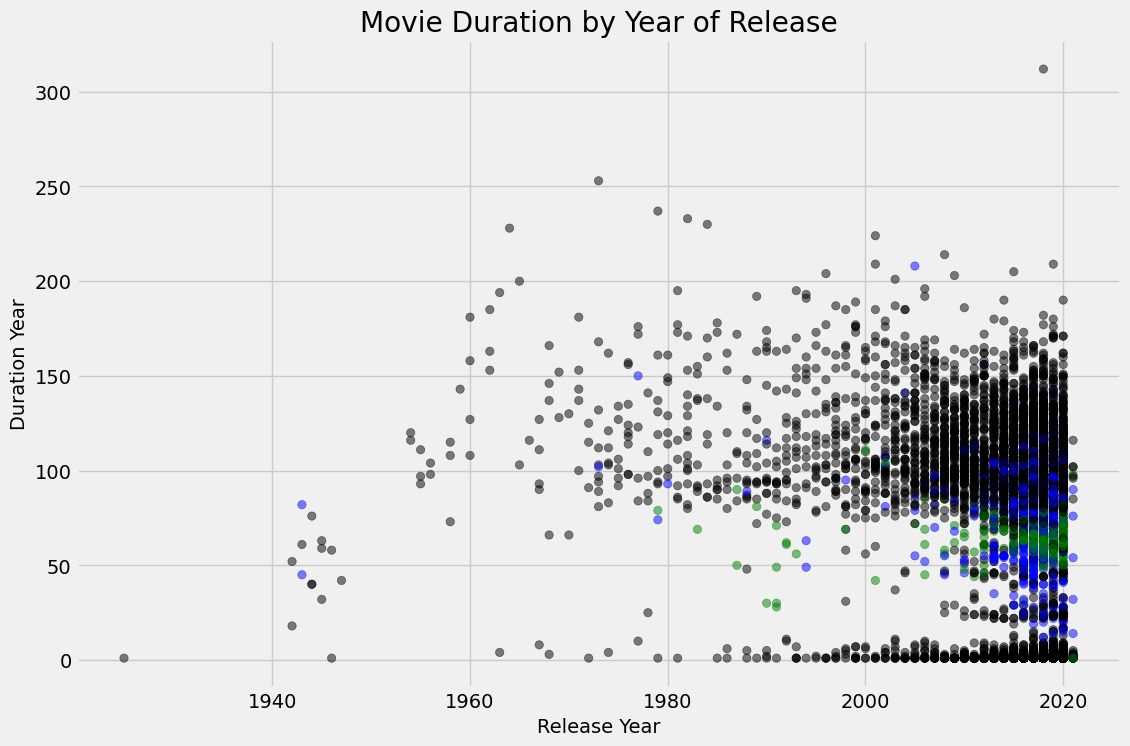

In [30]:
# Set the figure style and initalize a new figure
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset["release_year"],
netflix_movies_col_subset["duration"], c = colors, alpha = 0.5)

# Create a title and axis labels 
plt.title("Movie Duration by Year of Release")
plt.xlabel("Release Year")
plt.ylabel("Duration Year")
 
# Show the plot
plt.show()